In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from icecream import ic

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


#### Import key API code idea from Nicole Lund. Shared in UofA-PHX-VIRT-DATA-PT-03-2021, Slack: Resources Channel

In [26]:

# Import API key
from api_keys import weather_api_key
if weather_api_key == "YOUR KEY HERE!":
    import sys
    sys.path.append(r"/Users/rosaicelaroman/Desktop/Data_BootCamp/APIs/config_keys/")
    from api_keys_v2 import weather_api_key


In [28]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


616

#### Created base URL and established the units. Also created the dataframe where data will be stored.

In [30]:

base_url = "http://api.openweathermap.org/data/2.5/weather?q="
units = 'metric'
weather_df=pd.DataFrame({'cities': cities})

weather_df.head()

,cities
0,castro
1,tawau
2,ustye
3,saint anthony
4,esperance


#### Initiated the rest of the columns for the dataframe

In [41]:
weather_df['lat'] = ""
weather_df['lng'] = ""
weather_df['temp'] = ""
weather_df['humidity'] = ""
weather_df['cloudiness'] = ""
weather_df['wind'] = ""
weather_df.head()

,cities,lat,lng,temp,humidity,cloudiness,wind
0,castro,,,,,,
1,tawau,,,,,,
2,ustye,,,,,,
3,saint anthony,,,,,,
4,esperance,,,,,,


#### For loop to iterate the datafame rows and populate them with the data from the response. The exception also populates the empty column values with NaN values.

In [44]:
for index, row in weather_df.iterrows():
    # count+=1
    city = row['cities']
    cities_found = []
    
    print(f'Retrieving results for Index {index}: {city}')
    try:
        response = requests.get(base_url+city+"&units="+units+'&appid=' + weather_api_key).json()
        weather_df.loc[index, 'lat'] = response['coord']['lat']
        weather_df.loc[index, 'lng'] = response['coord']['lon']
        weather_df.loc[index, 'temp'] = response['main']['temp']
        weather_df.loc[index, 'humidity'] = response['main']['humidity']
        weather_df.loc[index, 'cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'wind'] = response['wind']['speed']
        cities_found.append(city)

        print(f'Found city: {city}')
    except:
        print(f"Missing city: {city}... Skipping")
        weather_df.loc[index, 'lat'] = float('NaN')
        weather_df.loc[index, 'lng'] = float('NaN')
        weather_df.loc[index, 'temp'] = float('NaN')
        weather_df.loc[index, 'humidity'] = float('NaN')
        weather_df.loc[index, 'cloudiness'] = float('NaN')
        weather_df.loc[index, 'wind'] = float('NaN')
    print(f'--------------------')
    # ic(response['coord']['lat'])
    # ic(response['coord']['lon'])
    # ic(response['main']['temp'])
    # ic(response['main']['humidity'])
    # ic(response['clouds']['all'])
    # ic(cities_found)


    # break


    # break

Retrieving results for Index 0: castro
Found city: castro
--------------------
Retrieving results for Index 1: tawau
Found city: tawau
--------------------
Retrieving results for Index 2: ustye
Found city: ustye
--------------------
Retrieving results for Index 3: saint anthony
Found city: saint anthony
--------------------
Retrieving results for Index 4: esperance
Found city: esperance
--------------------
Retrieving results for Index 5: hilo
Found city: hilo
--------------------
Retrieving results for Index 6: qaanaaq
Found city: qaanaaq
--------------------
Retrieving results for Index 7: cabo san lucas
Found city: cabo san lucas
--------------------
Retrieving results for Index 8: thompson
Found city: thompson
--------------------
Retrieving results for Index 9: necochea
Found city: necochea
--------------------
Retrieving results for Index 10: bakel
Found city: bakel
--------------------
Retrieving results for Index 11: jamestown
Found city: jamestown
--------------------
Retrievi

In [45]:
weather_df.head()

,cities,lat,lng,temp,humidity,cloudiness,wind
0,castro,-24.7911,-50.0119,11.61,88,8,1.44
1,tawau,4.2498,117.887,28.93,84,20,1.05
2,ustye,59.6304,39.736,6.57,95,100,3.17
3,saint anthony,45.0205,-93.218,7.85,81,90,1.54
4,esperance,-33.8667,121.9,21,56,100,5.66


#### Drop rows with na values that were added in the dataframe above.

In [46]:
weather_df.dropna(inplace=True)
weather_df.head(20)

,cities,lat,lng,temp,humidity,cloudiness,wind
0,castro,-24.7911,-50.0119,11.61,88,8,1.44
1,tawau,4.2498,117.887,28.93,84,20,1.05
2,ustye,59.6304,39.736,6.57,95,100,3.17
3,saint anthony,45.0205,-93.218,7.85,81,90,1.54
4,esperance,-33.8667,121.9,21,56,100,5.66
5,hilo,19.7297,-155.09,21.8,61,90,5.14
6,qaanaaq,77.484,-69.3632,-8.22,79,100,2.43
7,cabo san lucas,22.8909,-109.912,22.56,56,20,1.54
8,thompson,55.7435,-97.8558,-6,42,20,3.6
9,necochea,-38.5473,-58.7368,15,98,100,0.86


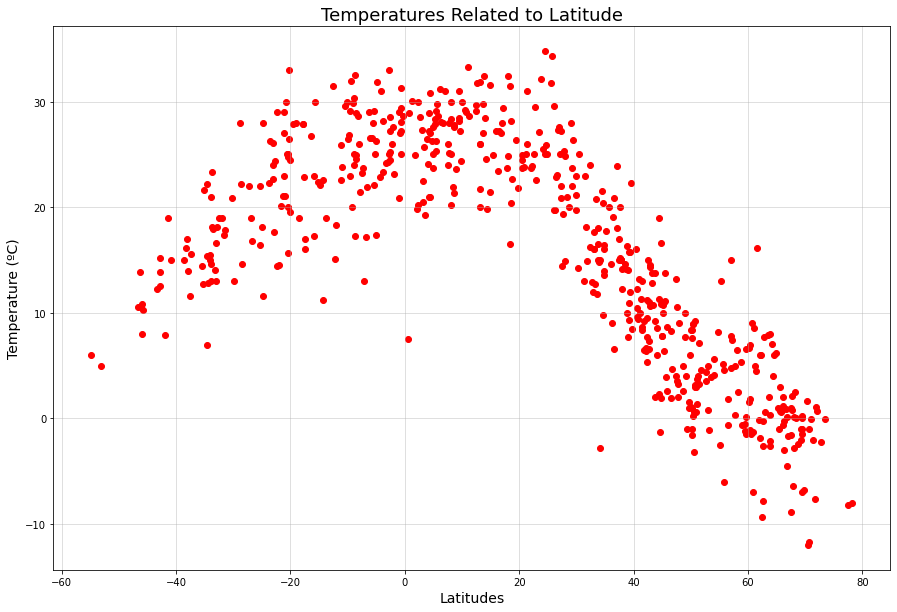

In [75]:
plt.figure(figsize=(15,10))
y_axis = weather_df['temp']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='r')
plt.grid(True, alpha=0.5)
plt.ylabel('Temperature (ºC)', size=14)
plt.xlabel('Latitudes', size=14)
plt.title("Temperatures Related to Latitude", size=18)
plt.savefig('temp_lat.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
plt.show()

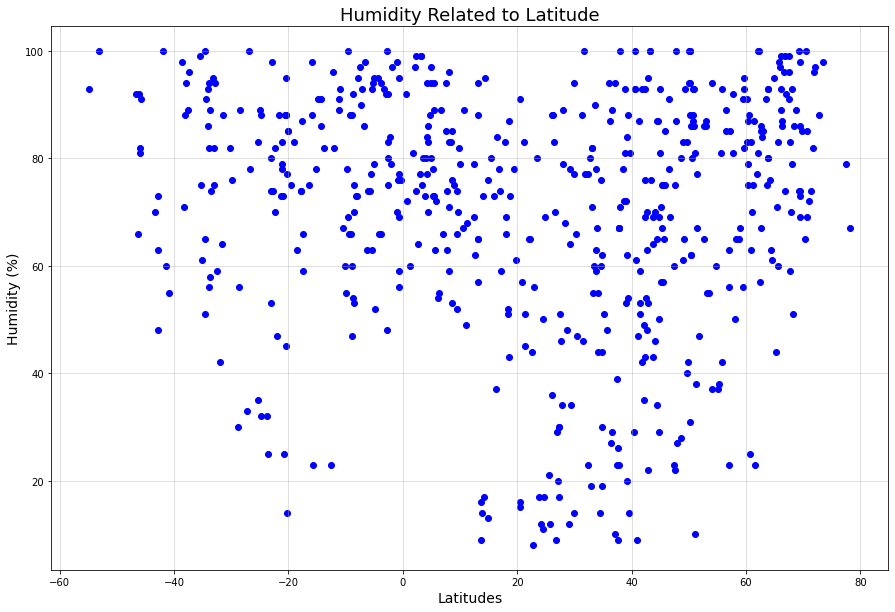

In [76]:
plt.figure(figsize=(15,10))
y_axis = weather_df['humidity']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='b')
plt.grid(True, alpha=0.5)
plt.ylabel('Humidity (%)', size=14)
plt.xlabel('Latitudes', size=14)
plt.title("Humidity Related to Latitude", size=18)
plt.savefig('hum_lat.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
plt.show()

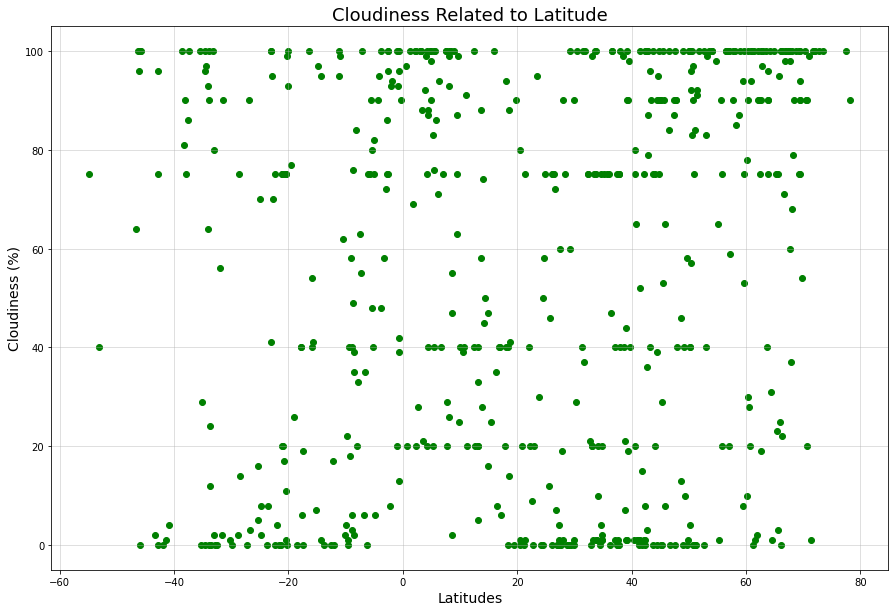

In [77]:
plt.figure(figsize=(15,10))
y_axis = weather_df['cloudiness']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='g')
plt.grid(True, alpha=0.5)
plt.ylabel('Cloudiness (%)', size=14)
plt.xlabel('Latitudes', size=14)
plt.title("Cloudiness Related to Latitude", size=18)
plt.savefig('cloud_lat.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
plt.show()

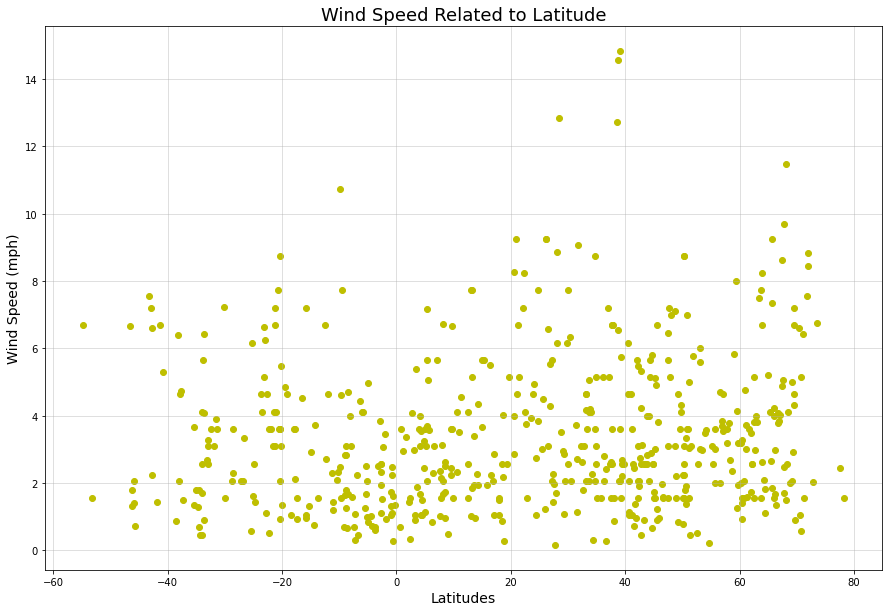

In [78]:
plt.figure(figsize=(15,10))
y_axis = weather_df['wind']
x_axis = weather_df['lat']
plt.scatter(x_axis, y_axis,marker='o',color='y')
plt.grid(True, alpha=0.5)
plt.ylabel('Wind Speed (mph)', size=14)
plt.xlabel('Latitudes', size=14)
plt.title("Wind Speed Related to Latitude", size=18)
plt.savefig('wind_lat.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
plt.show()

In [53]:
north_hemi_df = weather_df[(weather_df.lat>=0)]
north_hemi_df.head(20)

,cities,lat,lng,temp,humidity,cloudiness,wind
1,tawau,4.2498,117.887,28.93,84,20,1.05
2,ustye,59.6304,39.736,6.57,95,100,3.17
3,saint anthony,45.0205,-93.218,7.85,81,90,1.54
5,hilo,19.7297,-155.09,21.8,61,90,5.14
6,qaanaaq,77.484,-69.3632,-8.22,79,100,2.43
7,cabo san lucas,22.8909,-109.912,22.56,56,20,1.54
8,thompson,55.7435,-97.8558,-6,42,20,3.6
10,bakel,14.905,-12.4568,31.61,13,47,5.66
11,jamestown,42.097,-79.2353,6.36,49,75,5.66
15,upernavik,72.7868,-56.1549,-2.22,88,100,2.03


In [54]:
south_hemi_df = weather_df[(weather_df.lat<0)]
south_hemi_df.head(20)

,cities,lat,lng,temp,humidity,cloudiness,wind
0,castro,-24.7911,-50.0119,11.61,88,8,1.44
4,esperance,-33.8667,121.9,21,56,100,5.66
9,necochea,-38.5473,-58.7368,15,98,100,0.86
12,kavieng,-2.5744,150.797,27.23,75,96,1.52
13,rikitea,-23.1203,-134.969,26.12,74,100,6.62
14,ushuaia,-54.8,-68.3,6,93,75,6.69
18,souillac,-20.5167,57.5167,25,88,75,3.6
20,puerto ayora,-0.7393,-90.3518,25,95,13,2.24
21,busselton,-33.65,115.333,23.33,58,24,0.89
24,vaini,-21.2,-175.2,29,79,20,3.09


The line equation is y = -0.49 x + 32.02
The r-squared is: 0.81


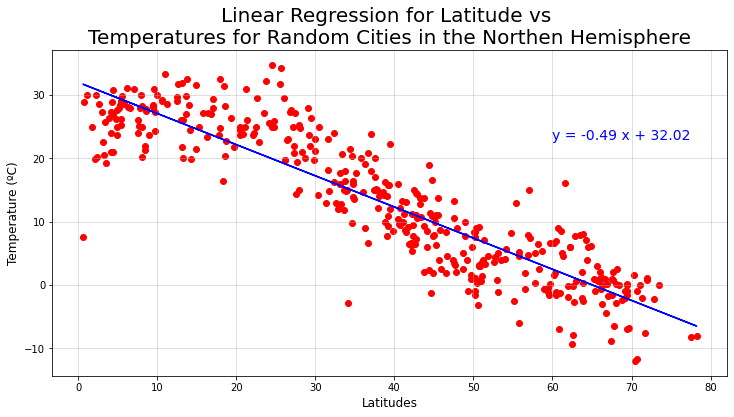

In [74]:
x_axis = north_hemi_df["lat"].astype(float) 
y_axis = north_hemi_df["temp"].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='r')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(60, 23, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Temperature (ºC)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nTemperatures for Random Cities in the Northen Hemisphere', size=20)
plt.savefig('temp_north.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')

print(f"The r-squared is: {r_value**2:.2f}")

The line equation is y = 0.34 x + 28.23
The r-squared is: 0.53


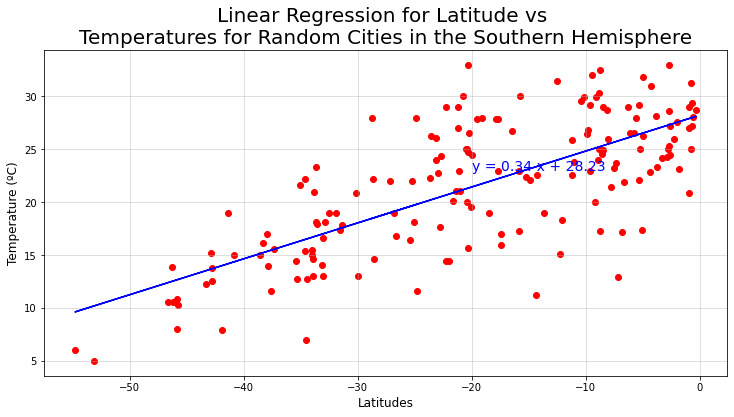

In [79]:
x_axis = south_hemi_df["lat"].astype(float) 
y_axis = south_hemi_df["temp"].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='r')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(-20, 23, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Temperature (ºC)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nTemperatures for Random Cities in the Southern Hemisphere', size=20)
plt.savefig('temp_south.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
print(f"The r-squared is: {r_value**2:.2f}")

The line equation is y = 0.18 x + 60.69
The r-squared is: 0.02


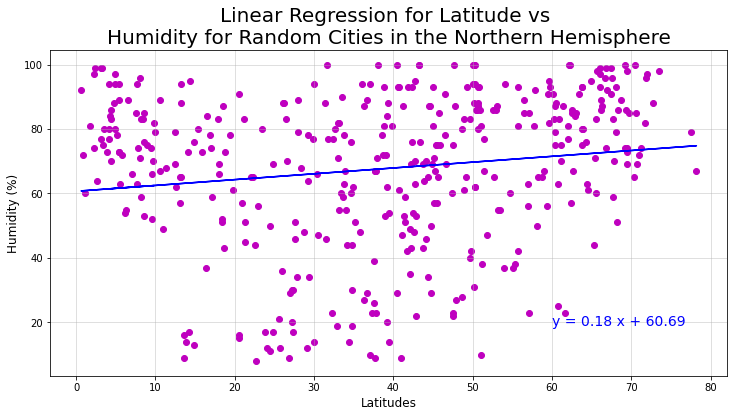

In [80]:
x_axis = north_hemi_df["lat"].astype(float) 
y_axis = north_hemi_df["humidity"].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='m')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(60, 19, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nHumidity for Random Cities in the Northern Hemisphere', size=20)
plt.savefig('hum_north.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
print(f"The r-squared is: {r_value**2:.2f}")


The line equation is y = 0.01 x + 75.88
The r-squared is: 0.00


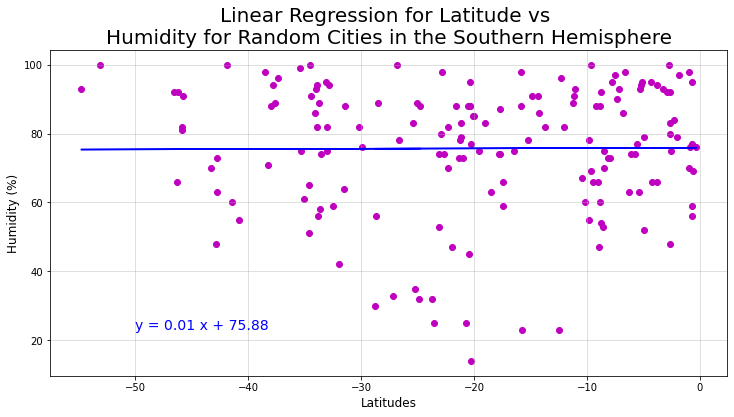

In [81]:
x_axis = south_hemi_df["lat"].astype(float) 
y_axis = south_hemi_df["humidity"].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='m')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(-50, 23, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nHumidity for Random Cities in the Southern Hemisphere', size=20)
plt.savefig('hum_south.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
print(f"The r-squared is: {r_value**2:.2f}")

The line equation is y = 0.32 x + 45.2
The r-squared is: 0.03


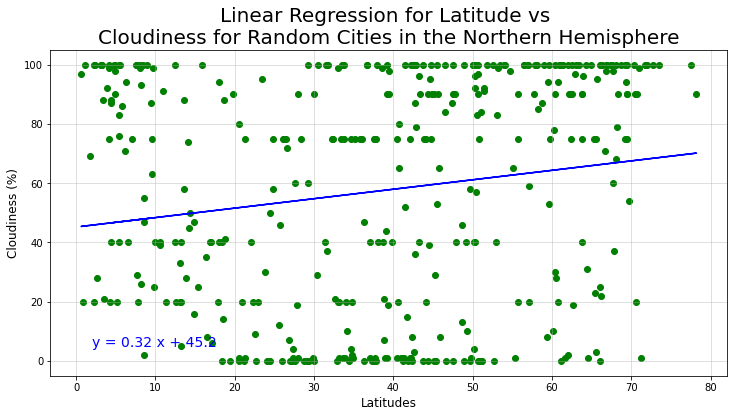

In [83]:
y_axis = north_hemi_df['cloudiness'].astype(float) 
x_axis = north_hemi_df['lat'].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='g')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(2, 5, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nCloudiness for Random Cities in the Northern Hemisphere', size=20)
plt.savefig('cloud_north.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
print(f"The r-squared is: {r_value**2:.2f}")


The line equation is y = 0.14 x + 51.94
The r-squared is: 0.00


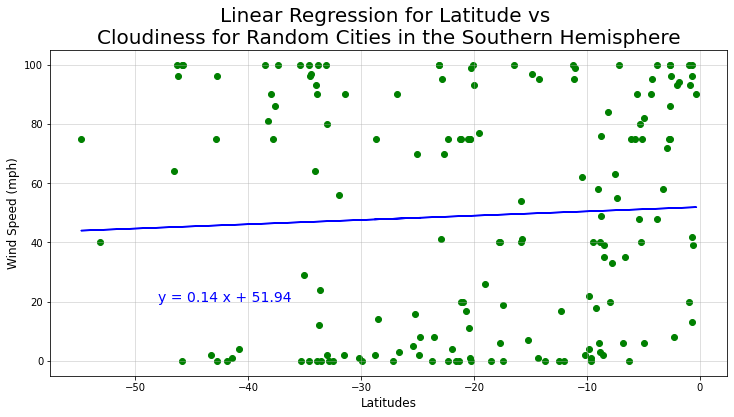

In [82]:
y_axis = south_hemi_df['cloudiness'].astype(float) 
x_axis = south_hemi_df['lat'].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='g')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(-48, 20, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Wind Speed (mph)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nCloudiness for Random Cities in the Southern Hemisphere', size=20)
plt.savefig('cloud_south.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')
print(f"The r-squared is: {r_value**2:.2f}")

The line equation is y = 0.01 x + 3.14
The r-squared is: 0.01


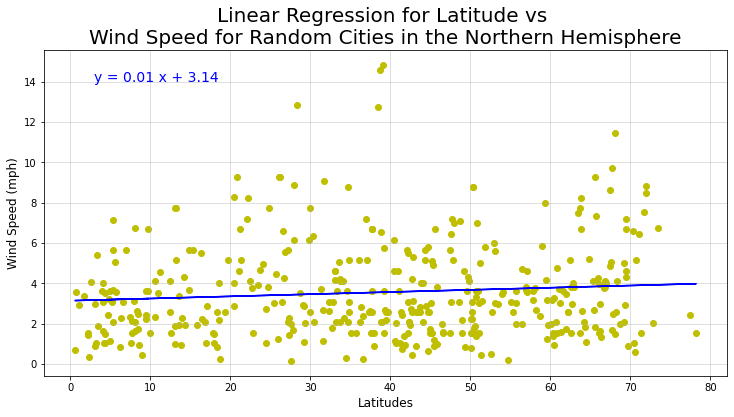

In [84]:
y_axis = north_hemi_df['wind'].astype(float) 
x_axis = north_hemi_df['lat'].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='y')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(3, 14, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Wind Speed (mph)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nWind Speed for Random Cities in the Northern Hemisphere', size=20)
plt.savefig('wind_north.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')

print(f"The r-squared is: {r_value**2:.2f}")

The line equation is y = -0.03 x + 2.27
The r-squared is: 0.05


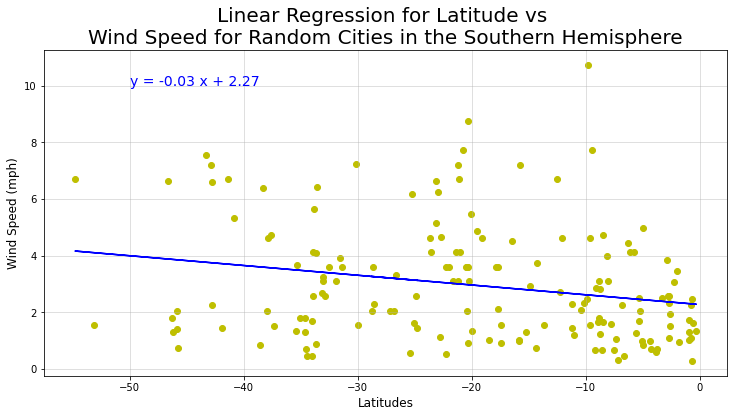

In [86]:
y_axis = south_hemi_df['wind'].astype(float) 
x_axis = south_hemi_df['lat'].astype(float)
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x + "+str(round(intercept,2))

print(f'The line equation is {line_eq}')

fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis, color='y')
ax = plt.plot(x_axis,regress_values,"b")
ax = plt.text(-50, 10, line_eq, size=14, color='b')
plt.xlabel('Latitudes', size=12)
plt.ylabel('Wind Speed (mph)', size=12)
plt.tight_layout(pad=0)
plt.grid(True, alpha=0.5)
plt.title('Linear Regression for Latitude vs \nWind Speed for Random Cities in the Southern Hemisphere', size=20)
plt.savefig('wind_south.png', facecolor='w', edgcolor='w', pad_inches=0.1, bbox_inches='tight')

print(f"The r-squared is: {r_value**2:.2f}")